In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import manifold
from sklearn import model_selection
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn import cluster
from sklearn import mixture
from sklearn import metrics

import matplotlib.pyplot as plt

from IPython.display import display, HTML
from typing import Callable


pd.set_option('display.max_columns', None)

In [2]:
data_raw = pd.read_csv('data/Country-data.csv')
data_raw.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data_raw['life_expec'].max()

82.8

In [5]:
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data_raw.drop(['country'], axis=1))
data_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [6]:
data_raw.drop(['country'], axis=1).corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [13]:
pca = decomposition.PCA(n_components=5)
pca_result = pca.fit(data_scaled)
display(pca_result.explained_variance_ratio_)
display(pca_result.explained_variance_ratio_.sum())
display(pca_result.explained_variance_ratio_.cumsum())

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

0.945309975643951

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998])

In [15]:
pca_result.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662]])

In [18]:
data_pca = pca_result.transform(data_scaled)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


In [19]:
data_pca.corr()

,0,1,2,3,4
0,1.000000e+00,-1.582576e-16,6.829138e-17,-3.015399e-17,9.733328e-17
1,-1.582576e-16,1.000000e+00,-4.336341e-17,-5.550421e-16,-6.446009e-17
2,6.829138e-17,-4.336341e-17,1.000000e+00,1.738998e-16,7.551113e-17
3,-3.015399e-17,-5.550421e-16,1.738998e-16,1.000000e+00,4.928652e-16
4,9.733328e-17,-6.446009e-17,7.551113e-17,4.928652e-16,1.000000e+00


In [23]:
def get_cluster_scores_kmeans(X_data, cluster_range, score_function):
    cluster_scores = list()
    for K in cluster_range:
        model = cluster.KMeans(n_clusters=K, init='k-means++', random_state=1)
        model.fit(X_data)
        y_labels_pred = model.labels_
        score = score_function(X_data, y_labels_pred)
        cluster_scores.append([K, score])

    return np.array(cluster_scores)

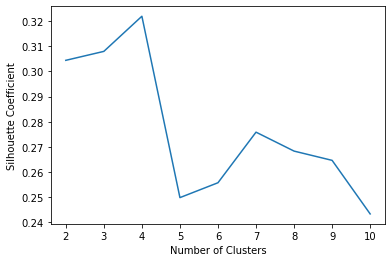

array([[ 2.        ,  0.30441995],
       [ 3.        ,  0.30797698],
       [ 4.        ,  0.32195838],
       [ 5.        ,  0.24979547],
       [ 6.        ,  0.25571481],
       [ 7.        ,  0.27583605],
       [ 8.        ,  0.26830308],
       [ 9.        ,  0.26461736],
       [10.        ,  0.2433095 ]])

In [24]:
cluster_scores = get_cluster_scores_kmeans(data_pca, np.arange(2, 10+1, 1), metrics.silhouette_score)
plt.plot(cluster_scores[:, 0], cluster_scores[:, 1])
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()
display(cluster_scores)

In [25]:
model = cluster.KMeans(n_clusters=4, init='k-means++', random_state=1)
model.fit(data_pca)
y_labels_pred = model.labels_

- country — название страны;
- child_mort — показатель смертности детей до 5 лет;
- exports — показатель экспорта на душу населения;
- health — показатель затрат на здравоохранение на душу населения;
- imports — показатель импорта на душу населения;
- Income — средний доход на душу населения;
- Inflation — годовой показатель инфляции;
- life_expec — средняя продолжительность жизни;
- total_fer — суммарный коэффициент рождаемости;
- gdpp — значение ВВП на душу населения

In [29]:
data_raw['cluster'] = y_labels_pred
data_raw.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [31]:
data_raw[data_raw['child_mort'] == data_raw['child_mort'].max()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1


In [32]:
data_raw[data_raw['gdpp'] == data_raw['gdpp'].min()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
26,Burundi,93.6,8.92,11.6,39.2,764,12.3,57.7,6.26,231,1


In [35]:
data_raw[(data_raw['child_mort'] == data_raw['child_mort'].max())|(data_raw['gdpp'] == data_raw['gdpp'].min())]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
66,Haiti,208.0,15.30,6.91,64.7,1500,5.45,32.1,3.33,662,1


In [40]:
data_raw[data_raw['cluster'] == 1].sort_values(by='life_expec', ascending=True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,1
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,1
